In [7]:
#Ridge Regression
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import Imputer
from sklearn.linear_model import Ridge
housing_data = pd.read_csv("../Assignment_data/Data_Q1/housing.csv",thousands=',')

In [8]:
# splitting the data into train and testset
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)

In [9]:
# predicting errors on varying lamda
import numpy
lambdaval = range(1,1000)
def ridge_error_list():
    imputer = Imputer(strategy="median")
    Y_test = pd.DataFrame(test_set.median_house_value)
    imputer.fit(Y_test)
    test_labels = imputer.transform(Y_test)
    
    # dropping columns median_house_value,ocean_proximity from train_set and test set
    train_data1 = train_set.drop(["median_house_value","ocean_proximity"], axis=1)
    test_data1 = test_set.drop(["median_house_value","ocean_proximity"], axis=1)
    train_label = train_set.as_matrix(columns = ["median_house_value"])
    test_label = test_set.as_matrix(columns = ["median_house_value"])
    
    #handling missing and Nan values of features by replacing them with its median 
    imputer.fit(train_data1)
    imputer.fit(test_data1)
    train_data1 = imputer.transform(train_data1)
    test_data1 = imputer.transform(test_data1)
    
    # adding first column in train and test matrices to one
    ones_matrix = np.ones((len(train_data1), 1))
    ones_test_matrix = np.ones((len(test_data1),1))
    new_train_matrix = np.c_[ones_matrix,train_data1]
    new_test_matrix = np.c_[ones_test_matrix,test_data1]
    
    # predicting errors on varying lambda
    errorlst = list() #holds the errors list on varying lambda value in ridge regression  
    transpose = new_train_matrix.T
    prod = np.dot(transpose, new_train_matrix)
    train_tras_y = np.dot(transpose,train_label)
    len_matrix = len(prod)
    identity_matrix = np.identity(len_matrix)
    identity_matrix[0][0] = 0
    all_parameters = list()
    
    for x in lambdaval: # iterate through all lambdas
        new_matrix = np.add(prod, x*identity_matrix)
        inverse_matrix = np.linalg.inv(new_matrix)
        predicted_params = np.dot(inverse_matrix,train_tras_y) # predicted parameters for specific lambda value
        params_lst = list() #holds list of predicted parameters
        predictions = list()
        #convert predicted_params to list and store in params_lst
        for x in range(len(predicted_params)):
            params_lst.append(predicted_params[x])    
        params_lst = numpy.array(params_lst)
        all_parameters.append(params_lst)
        
        # computing predicted label Y = X.(theta)
        predicted_label = numpy.dot(new_test_matrix,params_lst)
        
        # computing mean square error
        msq = compute_msq(test_label,predicted_label)
        
        errorlst.append(msq)
    return errorlst,all_parameters
    

In [10]:
from sklearn.metrics import mean_squared_error
# compute mean square error
def compute_msq(test_Label,housing_Predictions):
    lin_mse = mean_squared_error(test_Label, housing_Predictions)
    return lin_mse

In [11]:
import math
def main():
    output,params = ridge_error_list()
    opt_index = output.index(min(output))
    opt_lambda = lambdaval[opt_index]
    opt_params = params[opt_index]
    opt_mean_square_error = output[opt_index]
    print("optimal lambda estimated: " + str(opt_lambda))
    print("least root_mean_square_error: "+str(math.sqrt(opt_mean_square_error)))
    print("optimal parameters:")
    print(opt_params)
    plt.plot(lambdaval,output)

optimal lambda estimated: 372
least root_mean_square_error: 71105.94082852703
optimal parameters:
[[-3.29475358e+06]
 [-3.93196062e+04]
 [-3.93570904e+04]
 [ 1.23538914e+03]
 [-8.44912825e+00]
 [ 1.11346091e+02]
 [-3.86477210e+01]
 [ 5.42026677e+01]
 [ 4.06827180e+04]]
CPU times: user 680 ms, sys: 20 ms, total: 700 ms
Wall time: 455 ms


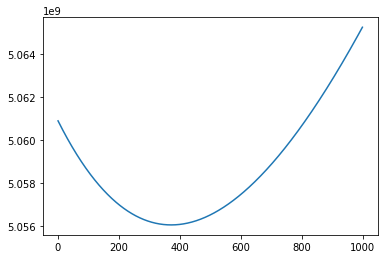

In [12]:
%%time
main()